In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf,pacf
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import time

In [2]:
import os
os.listdir('dataset/')

['airline-passengers.csv',
 'household_power_consumption.txt',
 'household_power_consumption.zip']

In [21]:
df = pd.read_csv('dataset/household_power_consumption.txt',delimiter=';', low_memory=False)
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0


In [5]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [22]:
# coonverting to datetime

df['DateTime']= df.Date + ' '+ df.Time


In [8]:
df.DateTime

0          16/12/2006 17:24:00
1          16/12/2006 17:25:00
2          16/12/2006 17:26:00
3          16/12/2006 17:27:00
4          16/12/2006 17:28:00
                  ...         
2075254    26/11/2010 20:58:00
2075255    26/11/2010 20:59:00
2075256    26/11/2010 21:00:00
2075257    26/11/2010 21:01:00
2075258    26/11/2010 21:02:00
Name: DateTime, Length: 2075259, dtype: object

In [26]:
df.DateTime = pd.to_datetime(df.DateTime)
%time

Wall time: 0 ns


In [27]:
df.DateTime

0         2006-12-16 17:24:00
1         2006-12-16 17:25:00
2         2006-12-16 17:26:00
3         2006-12-16 17:27:00
4         2006-12-16 17:28:00
                  ...        
2075254   2010-11-26 20:58:00
2075255   2010-11-26 20:59:00
2075256   2010-11-26 21:00:00
2075257   2010-11-26 21:01:00
2075258   2010-11-26 21:02:00
Name: DateTime, Length: 2075259, dtype: datetime64[ns]

In [28]:
# to drop the columns not needed anymore
df.drop(['Date','Time'],1, inplace=True)

In [29]:
# for a time series, the index has to be in timedelta
df.set_index('DateTime',inplace=True)

In [30]:
df_copy = df.copy()

In [32]:
df.Sub_metering_3.mean()

6.45844735712055

In [33]:
# replacing the missing data in sub_metering_3 with the mean

df.Sub_metering_3.fillna(df.Sub_metering_3.mean(),inplace=True)


In [34]:
df.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [35]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2010-11-26 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2010-11-26 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0


In [36]:
df.Global_reactive_power.value_counts()['?']

25979

In [37]:
df.loc[df.Global_reactive_power=='?']

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-21 11:23:00,?,?,?,?,?,?,6.458447
2006-12-21 11:24:00,?,?,?,?,?,?,6.458447
2006-12-30 10:08:00,?,?,?,?,?,?,6.458447
2006-12-30 10:09:00,?,?,?,?,?,?,6.458447
2007-01-14 18:36:00,?,?,?,?,?,?,6.458447
...,...,...,...,...,...,...,...
2010-09-28 19:09:00,?,?,?,?,?,?,6.458447
2010-09-28 19:10:00,?,?,?,?,?,?,6.458447
2010-09-28 19:11:00,?,?,?,?,?,?,6.458447


Had to create a copy, so that i could sample

In [38]:
df_copy = df.copy()

In [39]:
df_copy.drop(df_copy[df_copy.Global_active_power=='?'].index, inplace = True)


In [41]:
df_copy.loc[df.Global_reactive_power=='?'].count()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [43]:
df_copy = df_copy.astype('float64')

In [44]:
for i in df.columns:
    df[i] = df[i].replace('?', df_copy[i].mean()) 

In [45]:
df = df.astype('float64')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 206.7 MB


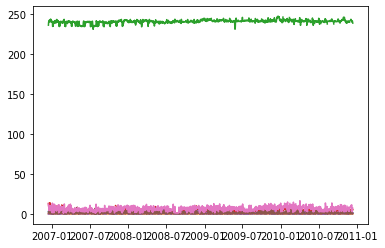

In [47]:
df_daily = df.resample('1D').mean()

plt.plot(df_daily)

In [52]:
from scipy.stats import pearsonr

corr, _ = pearsonr(df.Global_active_power, df.Global_reactive_power)
print(f'Pearson: {corr}')

Pearson: 0.2470170526440647
